In [25]:
import pybullet as p
import pybullet_data
import os
import time

import pybullet as p
import pybullet_data as pd
import math
import time

p.connect(p.GUI, options="--opengl2")
p.setAdditionalSearchPath(pd.getDataPath())
base_path = pd.getDataPath()
print(pd.getDataPath())

C:\Users\Roxanne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pybullet_data


In [26]:
p.resetSimulation()

p.setGravity(0, 0, -10)
planeId = p.loadURDF(os.path.join(base_path, "plane.urdf"))
cubeStartPos = [0, 0, 1]
cubeStartOrientation = p.getQuaternionFromEuler([0, 0, 0])
boxId = p.loadURDF("Assem1.SLDASM.urdf", cubeStartPos, cubeStartOrientation, useFixedBase = False)
cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)

useRealTimeSimulation = 0

In [31]:
def motor_control_pos(motors, Pos, robot):
    # Input:  motors n x 1 matrix with motor index (int)
    #         Pos    n x 1 matrix with desired motor position (float)
    
    Maxforce = 500
    p.setJointMotorControlArray(robot, motors, targetPositions = Pos, controlMode=p.POSITION_CONTROL, forces=Maxforce)
    

In [27]:
for i in range (100):
    p.stepSimulation()
    time.sleep(1./240.)
    setJointMotorControlArray()
    
    p.setJointMotorControl2(boxId, j, controlMode=p.VELOCITY_CONTROL, force=0)
    
cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
print(cubePos,cubeOrn)

(-0.0289898072236066, -0.0114856555953193, 0.10900135784761207) (9.52296280407142e-16, -5.940780602626503e-17, -2.2485480055585118e-17, 1.0)


rgba shape=(200, 320, 4), dtype=uint8


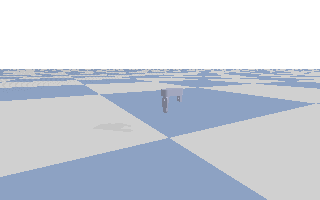

depth shape=(200, 320), dtype=float32, as values from 0.0 (near) to 1.0 (far)


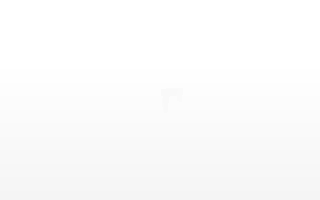

mask shape=(200, 320), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


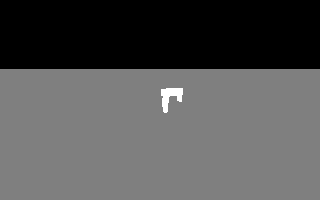

In [28]:
import numpy as np
from PIL import Image
from IPython.display import display

width = 320
height = 200
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=cubePos,
        distance=.5,
        yaw=60,
        pitch=-10,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))
print(f"depth shape={depth.shape}, dtype={depth.dtype}, as values from 0.0 (near) to 1.0 (far)")
display(Image.fromarray((depth*255).astype('uint8')))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))
p.disconnect()